# Lista de Exercícios IV 

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 05/10/2020

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 1

Primeiramente, vamos criar uma função `f(x)` que retorne a função hiperbólica $1+\frac{1}{2}\tanh{2x}$:

In [3]:
def f(x):
    return 1+0.5*np.tanh(2*x)

Agora vamos definir uma função chamada `df_dx(x)` que recebe como parâmetro uma variável $x$ e calcula o valor da derivada $\frac{df}{dx}$ usando o método das diferenças centradas que consiste em:

$$f'(x)=\frac{f(x+h)-f(x-h)}{2h}+O(h^{2})$$

In [4]:
def df_dx(x):
    h = 10**-5
    return (f(x + 0.5 * h) - f(x - 0.5 * h)) / h

Nosso objetivo é calcular $f'(x)$ no intervalo $-2\leq x\leq2$, mas antes vamos determinar uma fórmula fechada e analítica para a derivada de $f(x)$:

$$\frac{df}{dx}=\frac{d}{dx}1+\frac{1}{2}\tanh{(2x)}=\frac{d}{dx}(1)+\frac{d}{dx}\Bigg(\frac{1}{2}\tanh{(2x)}\Bigg)=0+\text{sech}^{2}{(2x)}=\frac{1}{\cosh^{2}{(2x)}}$$

$\blacksquare$

Agora vamos definir uma função `g(x)` que irá retornar o valor analítico da derivada $f'(x)$:

In [5]:
def g(x):
    return 1/np.cosh(2*x)**2

Definimos o intervalo $[-2,2]$ que será plotado:

In [6]:
x_vals = np.linspace(-2, 2, 100)
df_vals = list(map(df_dx, x_vals))
g_vals = list(map(g, x_vals))

Uma função para deixar o plot melhor, esteticamente falando...

In [7]:
def opt_plot():
        plt.minorticks_on()
        plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
        plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Finalmente, vamos plotar a nossa derivada $f'(x)$:

<IPython.core.display.Javascript object>


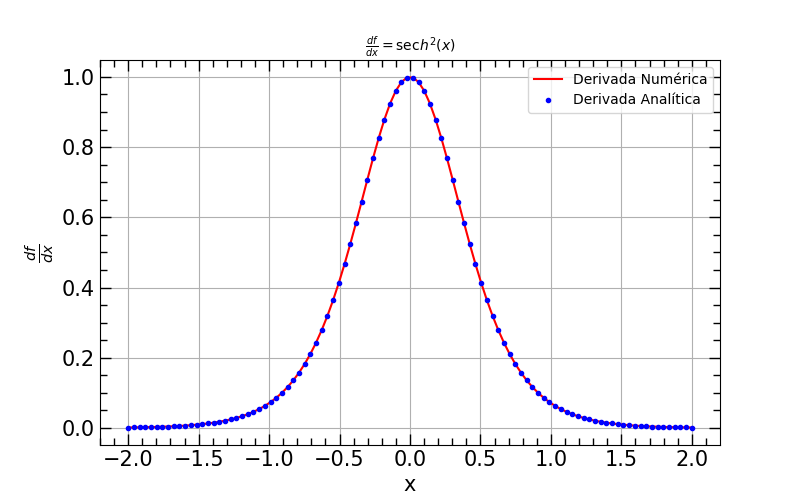

In [8]:
plt.figure(figsize=(8,5))

plt.plot(x_vals, df_vals, 'r', label='Derivada Numérica')
plt.plot(x_vals, g_vals, 'b.', label='Derivada Analítica')
plt.title(r"$\frac{df}{dx}=\sech^2(x)$",fontsize=10)
plt.xlabel('x', fontsize=15)
plt.ylabel(r'$\frac{df}{dx}$',fontsize=15)

plt.legend(loc='best')
plt.grid()
opt_plot()

$\text{ }$

## Problema 2

### Letra a)

Agora vamos calcular $f'(x)$ usando uma aproximação de ordem 3.  

Para isso, vamos definir uma função `df_dx_3(x)` que irá retornar a derivada usando uma aproximação de ordem 3 que pode ser determinada pela fórmula:

$$f'(x)=\frac{f(x-\frac{3}{2}h)-f(x+\frac{3}{2}h)-27f(x-\frac{1}{2}h)+27f(x+\frac{1}{2}h)}{24h}$$

In [9]:
def df_dx_3(x):
    h = 10**-5
    return (f(x-3*h/2)/24-f(x+3*h/2)/24-27*f(x-h/2)/24+27*f(x+h/2)/24)/h

Como desejamos ver a eficâcia da aproximação de ordem 3 para $f'(x)$, vamos definir os valores do intervalo a serem plotados:

In [10]:
df3_vals = list(map(df_dx_3, x_vals))

Agora vamos ao plot...

<IPython.core.display.Javascript object>


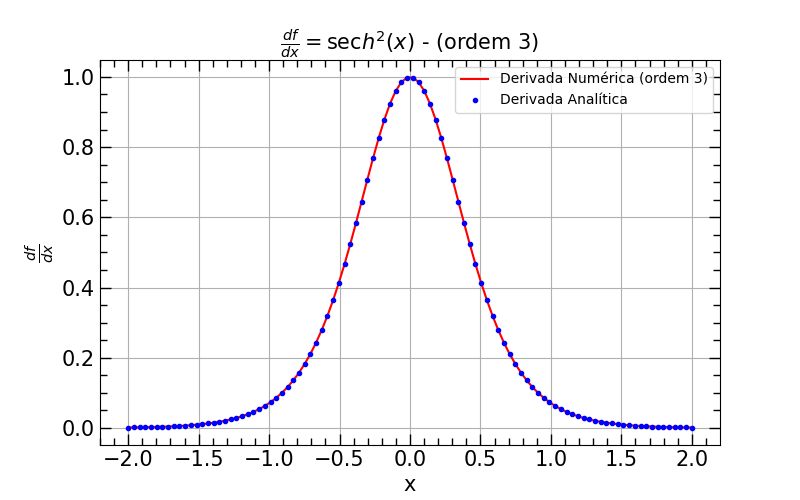

In [11]:
plt.figure(figsize=(8,5))

plt.plot(x_vals, df3_vals, 'r', label='Derivada Numérica (ordem 3)')
plt.plot(x_vals, g_vals, 'b.', label='Derivada Analítica')
plt.title(r"$\frac{df}{dx}=\sech^2(x)$ - (ordem 3)",fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel(r'$\frac{df}{dx}$',fontsize=15)

plt.legend(loc='best')
plt.grid()
opt_plot()

### Letra b)

Agora vamos calcular a derivada no ponto $x=0.0$ usando o método das diferenças centradas e com os seguintes valores para $h$ : $10^{-2},10^{-3},\ldots,10^{-7}$. 

In [12]:
h_values = np.zeros(6)

for i in range(0,6):
    h_values[i] = 10**-(i+2)

Agora vamos calcular $f'(0)$ para cada um dos valores de $h$:

In [13]:
df0_dx = np.zeros(6)

for i in range(0,6):
    x = 0
    df0_dx[i] = (f(x+0.5*h_values[i])-f(x-0.5*h_values[i]))/h_values[i]

Antes de avaliar nossos resultados, vamos determinar o valor numérico de $f'(0)$:

$$f'(0)=\text{sech}^{2}(2\cdot0)=\frac{1}{\underbrace{\cosh^{2}{(0)}}_{1}}=1$$

Agora, avaliemos nossos resultados...

In [14]:
for i in range(0,6):
    print('Para h =', h_values[i], ' temos df(0)/dx =',df0_dx[i])

Para h = 0.01  temos df(0)/dx = 0.9999666679999408
Para h = 0.001  temos df(0)/dx = 0.999999666666862
Para h = 0.0001  temos df(0)/dx = 0.9999999966670003
Para h = 1e-05  temos df(0)/dx = 0.9999999999621422
Para h = 1e-06  temos df(0)/dx = 1.0000000000287557
Para h = 1e-07  temos df(0)/dx = 0.9999999994736442


Agora vamos determinar o erro em cada uma de nossas medições, para isso vamos calcular o erro subtraindo o valor exato do valor obtido:

In [15]:
h_error = np.zeros(6)

for i in range(0,6):
    h_error[i] = 1.0 - df0_dx[i]

Avaliemos o erro de cada valor de $h$...

In [16]:
for i in range(0,6):
    print('Erro = ', abs(h_error[i]), ' (h = ', h_values[i],')')

Erro =  3.333200005917192e-05  (h =  0.01 )
Erro =  3.3333313798067365e-07  (h =  0.001 )
Erro =  3.3329996540487627e-09  (h =  0.0001 )
Erro =  3.78578279836006e-11  (h =  1e-05 )
Erro =  2.8755664516211255e-11  (h =  1e-06 )
Erro =  5.26355847796367e-10  (h =  1e-07 )


Sabemos que o melhor valor para $h$ é aquele no qual o erro é mínimo. Logo, baseado nos resultados, concluímos que o melhor valor é para $h=10^{-6}$, pois apresenta o menor erro (2.8755664516211255e-11).

### Letra c)

Vamos repetir o que foi feito no item anterior, mas dessa vez vamos usar uma aproximação de ordem 3 ao invés de diferenças centradas para calcular $f'(0)$.

In [17]:
df0_dx_3 = np.zeros(6) 

for i in range(0,6):
    x = 0
    df0_dx_3[i] = (f(x-3*h_values[i]/2)/24-f(x+3*h_values[i]/2)/24-27*f(x-h_values[i]/2)/24+27*f(x+h_values[i]/2)/24)/h_values[i]

Agora vamos expor os resultados calculados:

In [18]:
for i in range(0,6):
    print('Para h =', h_values[i], ' temos df(0)/dx =',df0_dx_3[i])

Para h = 0.01  temos df(0)/dx = 0.9999999880048627
Para h = 0.001  temos df(0)/dx = 0.9999999999990017
Para h = 0.0001  temos df(0)/dx = 0.9999999999998899
Para h = 1e-05  temos df(0)/dx = 0.9999999999843466
Para h = 1e-06  temos df(0)/dx = 1.000000000139778
Para h = 1e-07  temos df(0)/dx = 1.0000000005838672


Agora vamos calcular e expor os erros para cada valor de $h$:

In [19]:
h_error_3 = np.zeros(6)

for i in range(0,6):
    h_error_3[i] = 1.0 - df0_dx_3[i]
    
for i in range(0,6):
    print('Erro (ordem 3) = ', abs(h_error_3[i]), ' (h = ', h_values[i],')')

Erro (ordem 3) =  1.1995137327858174e-08  (h =  0.01 )
Erro (ordem 3) =  9.983125437429408e-13  (h =  0.001 )
Erro (ordem 3) =  1.1013412404281553e-13  (h =  0.0001 )
Erro (ordem 3) =  1.565336749109747e-11  (h =  1e-05 )
Erro (ordem 3) =  1.397779669787269e-10  (h =  1e-06 )
Erro (ordem 3) =  5.838671768287895e-10  (h =  1e-07 )


Analogamente ao item anterior, quanto menor o erro, melhor é o valor de $h$. Aqui já notamos uma coisa curiosa, o melhor valor de $h$ utilizando uma aproximação de ordem 3 é $h=10^{-4}$, pois apresenta o menor erro (1.1013412404281553e-13), ou seja, o valor de $h$ ótimo para o método de aproximação de ordem 3 é maior que o valor de $h$ ótimo para o método das diferenças centradas.

Em computação, independentemente da linguagem, quanto mais próximos forem os números no qual se está subtraindo maior será o erro (de arredondamento). Além disso, a aproximação de ordem 3 gera uma aproximação melhor para a derivada de uma curva qualquer. Nota-se que para a aproximação de ordem 3 não necessita de um valor para $h$ muito pequeno para se ter uma precisão boa, por conta disso, o erro de arredondamento não se faz muito presente no ínicio dos cálculos e consequentemente, a propagação do erro não se torna muito significativa.

$\text{ }$

## Problema 3

Agora vamos determinar, analiticamente e numericamente, a derivada segunda $f''(x)$ no intervalo $[-2,2]$.

Comecemos determinando uma fórmula fechada (ou seja, analítica) para $f''(x)$, para isso vamos derivar $f'(x)$ e aplicar a regra da cadeia:

$$\frac{d^{2}f}{dx^{2}}=\frac{d}{dx}\Big(\text{sech}^{2}{(2x)}\Big)=2\text{sech}^{2}(2x)\frac{d}{dx}\Big(\text{sech}^{2}(2x)\Big)=2\text{sech}^{2}(2x)(-\text{sech}(2x)\tanh{(2x)}\cdot2)\implies$$

$$\implies\frac{d^{2}f}{dx^{2}}=-4\text{sech}^{2}(2x)\tanh{(2x)}=-(2\cdot\text{sech}(2x))^{2}\cdot\tanh{(2x)}$$

$\blacksquare$

Agora vamos determinar numericamente a derivada segunda de $f(x)$, para isso vamos criar uma função `df2_dx2(x)` que irá determinar a derivada de segunda ordem segundo a fórmula abaixo:

$$f''(x)=\frac{f(x+h)-2f(x)+f(x-h)}{h^{2}}+O(h^{2})$$

In [20]:
def d2f_dx2(x):
    h = 10**-5
    return (f(x+h)-2*f(x)+f(x-h))/h**2

Vamos criar uma função `g2(x)` que irá plotar a derivada analítica de segunda ordem de $f(x)$:

In [21]:
def g2(x):
    return -(4*(1/np.cosh(2*x)**2))*(np.tanh(2*x))

Analogamente ao Problema 1, definimos o intervalo a ser plotado:

In [22]:
d2f_vals = list(map(d2f_dx2, x_vals))
g2_vals = list(map(g2, x_vals))

Agora vamos ao plot...

<IPython.core.display.Javascript object>


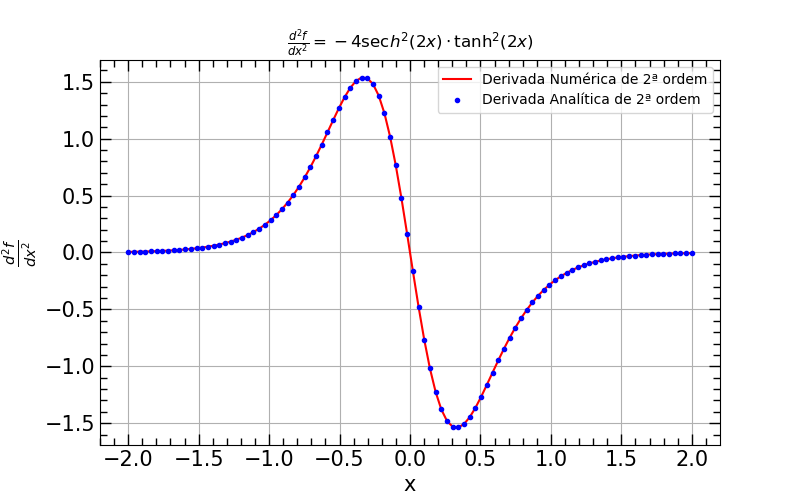

In [23]:
plt.figure(figsize=(8,5))

plt.plot(x_vals, d2f_vals, 'r', label='Derivada Numérica de 2ª ordem')
plt.plot(x_vals, g2_vals, 'b.', label='Derivada Analítica de 2ª ordem')
plt.title(r"$\frac{d^{2}f}{dx^{2}}=-4\sech^{2}(2x)\cdot\tanh^{2}{(2x)}$")
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$\frac{d^{2}f}{dx^{2}}$',fontsize=15)

plt.legend(loc='best')
plt.grid()
opt_plot()

$\text{ }$

## Problema 4

### Letra a)

Pelo princípio da superposição, podemos somar os potenciais de cada partícula para obter o campo elétrico gerado por elas por meio do operador gradiente. Podemos expressar o potencial elétrico $\phi$ de uma carga pontual $q$ a uma distância $r$ da origem por:

$$\phi=\frac{q}{4\pi\epsilon_{0}r}$$

Sendo $q=\pm1c$ para ambas as cargas e $r=10cm=10^{-2}m$ a distância entre elas, vamos determinar o potencial resultante gerado por ambas as vargas em uma região quadrada de área $A=1m^{2}$. 

Vamos começar definindo uma função `phi(r,signal)` que retorna o valor do potencial da carga:

In [24]:
def phi(r,signal):
    q = 1                          # [C]
    eps_0 = 8.854187817*10**-12    # [F * m**-1]
    
    if signal == 0:
        return q/(4*np.pi*eps_0*(r+1e-16))
    else:
        return -q/(4*np.pi*eps_0*(r+1e-16))

Agora definimos uma função `R(x,y)` que irá determinar a distância $r$:

In [25]:
def R(x,y):
    return np.sqrt(x**2+y**2)

Agora vamos definir alguns parâmetros que iremos utilizar na hora de realizar o plot do gráfico de densidade, como o númeor de pontos `points`, o valor das cargas `side`, o espaçamento `spacing` e um array vazio `Ints` onde serão armazenados os valores para o plot:

In [26]:
side = 1
points = 200
spacing = side/points

Ints = np.empty([points,points],float)

Por fim, vamos ao plot de densidade...

<IPython.core.display.Javascript object>


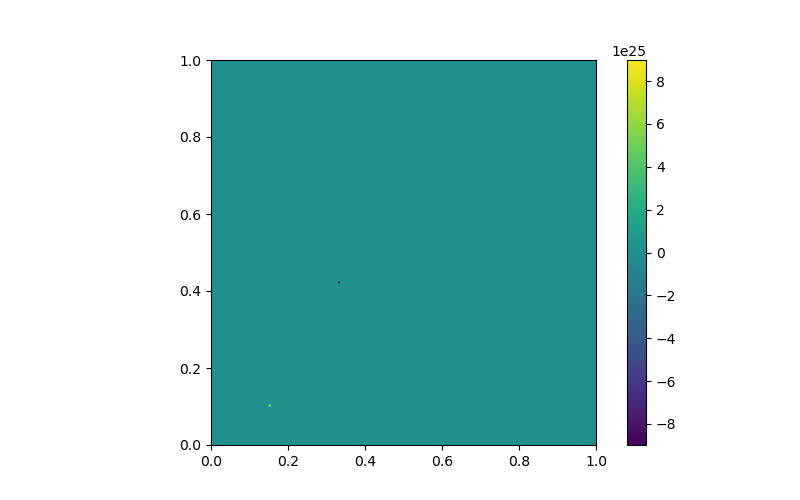

In [27]:
for i in range(points):
    for j in range(points):
        Ints[i][j] = phi(R(20-i,30-j),0) + phi(R(84-i,66-j),1)
        
plt.figure(figsize=(8,5))
plt.imshow(Ints, origin = 'lower', extent = [0, side, 0, side])
plt.colorbar()
plt.show()

### Letra b)

Vamos definir duas funções `partialx(f,x,y)` e `partialy(f,x,y)` que irão retornar as derivadas parciais $\phi_{x}$ e $\phi_{y}$, respectivamente:

In [28]:
def partialx(f, x, y):
    r = R(x,y)
    h = 0.00001
    return (f(R(x-3*h/2,y))/24-f(R(x+3*h/2,y))/24-27*f(R(x-h/2,y))/24+27*f(R(x+h/2,y))/24)/h

def partialy(f, x, y):
    r = R(x,y)
    h = 0.00001
    return (f(R(x,y-3*h/2))/24-f(R(x,y+3*h/2))/24-27*f(R(x,y-h/2))/24+27*f(R(x,y+h/2))/24)/h

Agora, apenas por questão de conveniência, iremos criar duas funções `phi_p(r)` e `phi_m(r)` que irão retornar os potenciais elétricos positivo e negativo, respectivamente. Faremos isso para facilitar a sua implementação quando formos usá-la dentro das funções `partialx(f,x,y)` e `partialy(f,x,y)` criadas anteriormente.

In [29]:
def phi_p(r):
    q = 1 
    epsilon_0 = 8.854187817*10**-12 
    return q/(4*np.pi*epsilon_0*(r+1e-16))
def phi_m(r):
    q = 1 
    epsilon_0 = 8.854187817*10**-12
    return -q/(4*np.pi*epsilon_0*(r+1e-16))

Agora criamos um array vazio `NInts` onde armazenaremos os resultados dos cálculos e em seguida usaremos esses dados para realizar o plot:

<IPython.core.display.Javascript object>


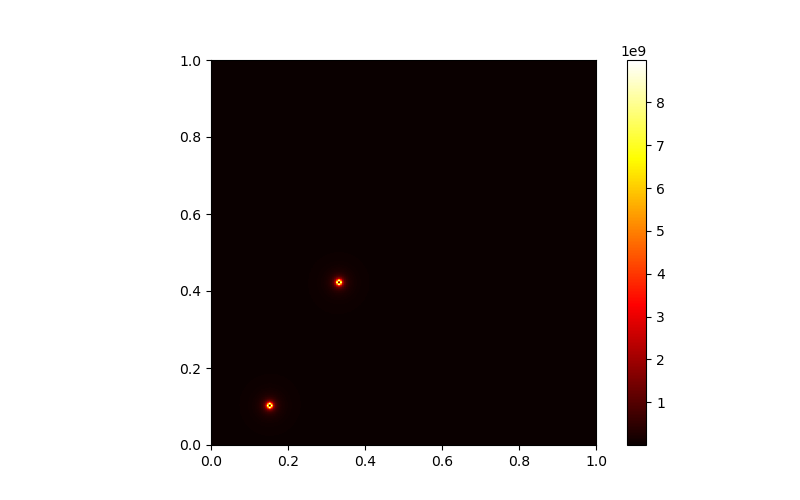

In [30]:
NInts = np.empty([points,points],float)

for i in range(points):
    for j in range(points):  
        xi = partialx(phi_m,20-i,30-j) + partialx(phi_p,84-i,66-j)
        yj = partialy(phi_m,20-i,30-j) + partialy(phi_p,84-i,66-j)
        NInts[i,j] = np.sqrt(xi**2 + yj**2)
        
plt.figure(figsize=(8,5))
plt.imshow(NInts, origin = 'lower', extent = [0, side, 0, side])
plt.hot()
plt.colorbar()
plt.show()

$\text{ }$